In [ ]:
  #Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
# Load data
url='https://drive.google.com/uc?id=1jmnxXFTp1SrhlO7f-uEU05fuUbaMcKQq'
df = pd.read_csv(url, sep=';')

In [ ]:
df.head()

,customer_id,plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,target_offer
0,C00001,Prepaid,Realme,1.50,0.804146,7.98,13,70000.0,4,0.284419,0,General Offer
1,C00002,Postpaid,Vivo,1.09,0.107686,9.56,9,63000.0,3,0.115086,0,General Offer
2,C00003,Postpaid,Xiaomi,3.24,0.313894,4.61,13,89000.0,7,0.402998,0,General Offer
3,C00004,Prepaid,Apple,5.32,0.420158,6.96,8,67000.0,4,0.302169,0,General Offer
4,C00005,Prepaid,Huawei,1.91,0.251638,11.01,21,72000.0,5,0.487911,0,General Offer


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  object 
 1   plan_type          10000 non-null  object 
 2   device_brand       10000 non-null  object 
 3   avg_data_usage_gb  10000 non-null  float64
 4   pct_video_usage    10000 non-null  float64
 5   avg_call_duration  10000 non-null  float64
 6   sms_freq           10000 non-null  int64  
 7   monthly_spend      10000 non-null  float64
 8   topup_freq         10000 non-null  int64  
 9   travel_score       10000 non-null  float64
 10  complaint_count    10000 non-null  int64  
 11  target_offer       10000 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


In [ ]:
print("\nMissing value per fitur:")
print(df.isnull().sum())


Missing value per fitur:
customer_id          0
plan_type            0
device_brand         0
avg_data_usage_gb    0
pct_video_usage      0
avg_call_duration    0
sms_freq             0
monthly_spend        0
topup_freq           0
travel_score         0
complaint_count      0
target_offer         0
dtype: int64


In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.958883,0.402639,9.971357,15.010800,109776.500000,2.986600,0.282441,0.492600
std,4.192909,0.195741,4.954993,3.872775,46237.321903,1.709828,0.158366,0.704127
min,0.030000,0.000000,-8.370000,4.000000,-13000.000000,0.000000,0.003376,0.000000
25%,2.870000,0.265290,6.650000,12.000000,78000.000000,2.000000,0.158775,0.000000
50%,4.990000,0.400116,10.020000,15.000000,102000.000000,3.000000,0.261206,0.000000
75%,8.040000,0.535161,13.320000,18.000000,135000.000000,4.000000,0.385656,1.000000
max,39.020000,1.000000,27.770000,31.000000,450000.000000,12.000000,0.854814,5.000000


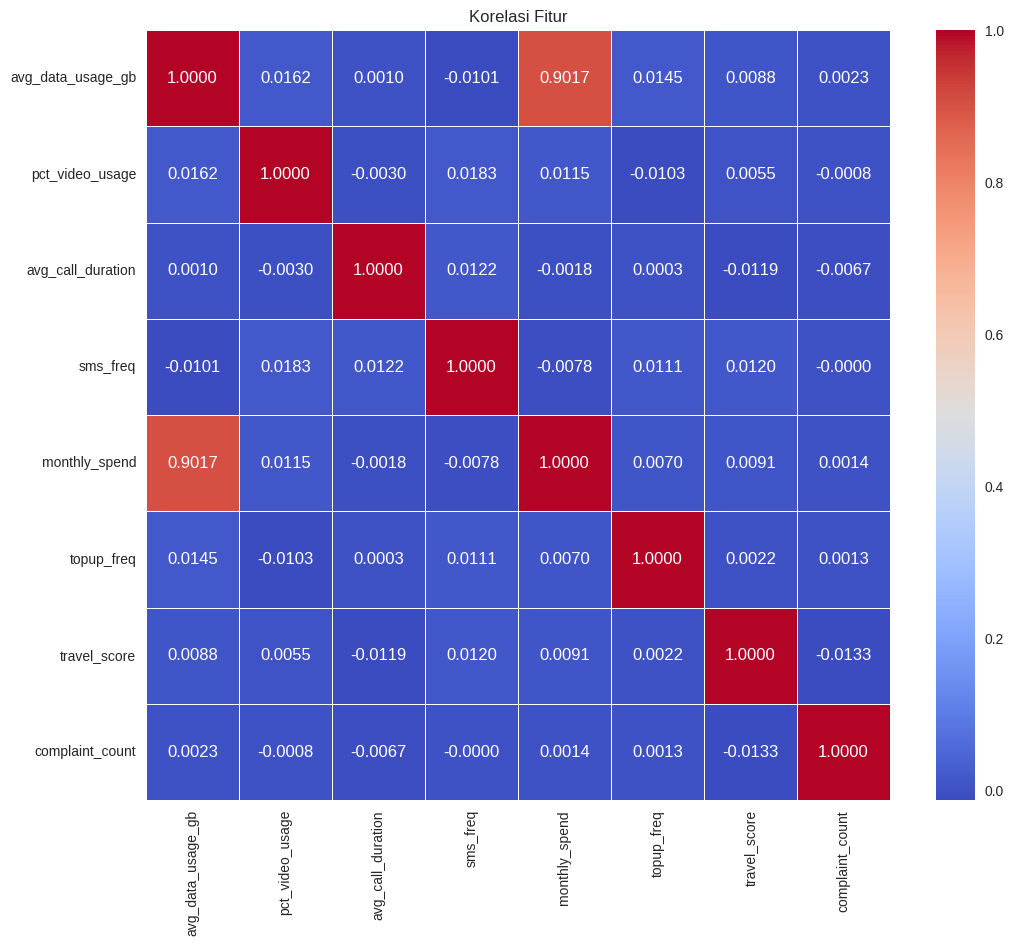

In [ ]:
# Menampilkan korelasi antar fitur
num_features = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.title("Korelasi Fitur")
plt.show()

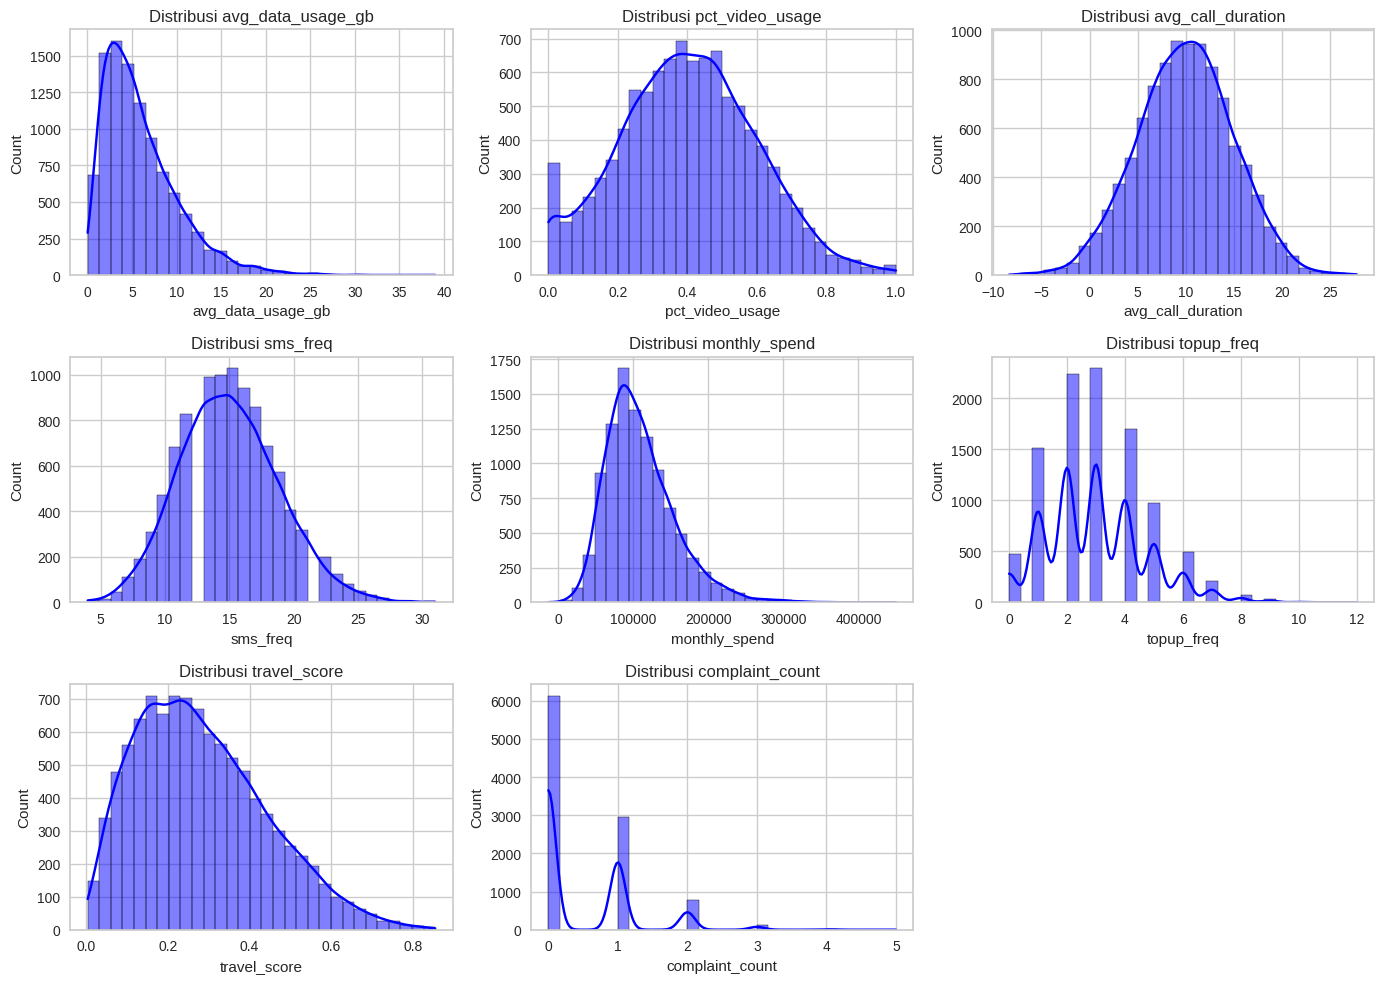

In [ ]:
# Numerical Features
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
  plt.subplot(3, 3, i)
  sns.histplot(df[column], bins=30, kde=True, color='blue')
  plt.title(f"Distribusi {column}")

plt.tight_layout()
plt.show()

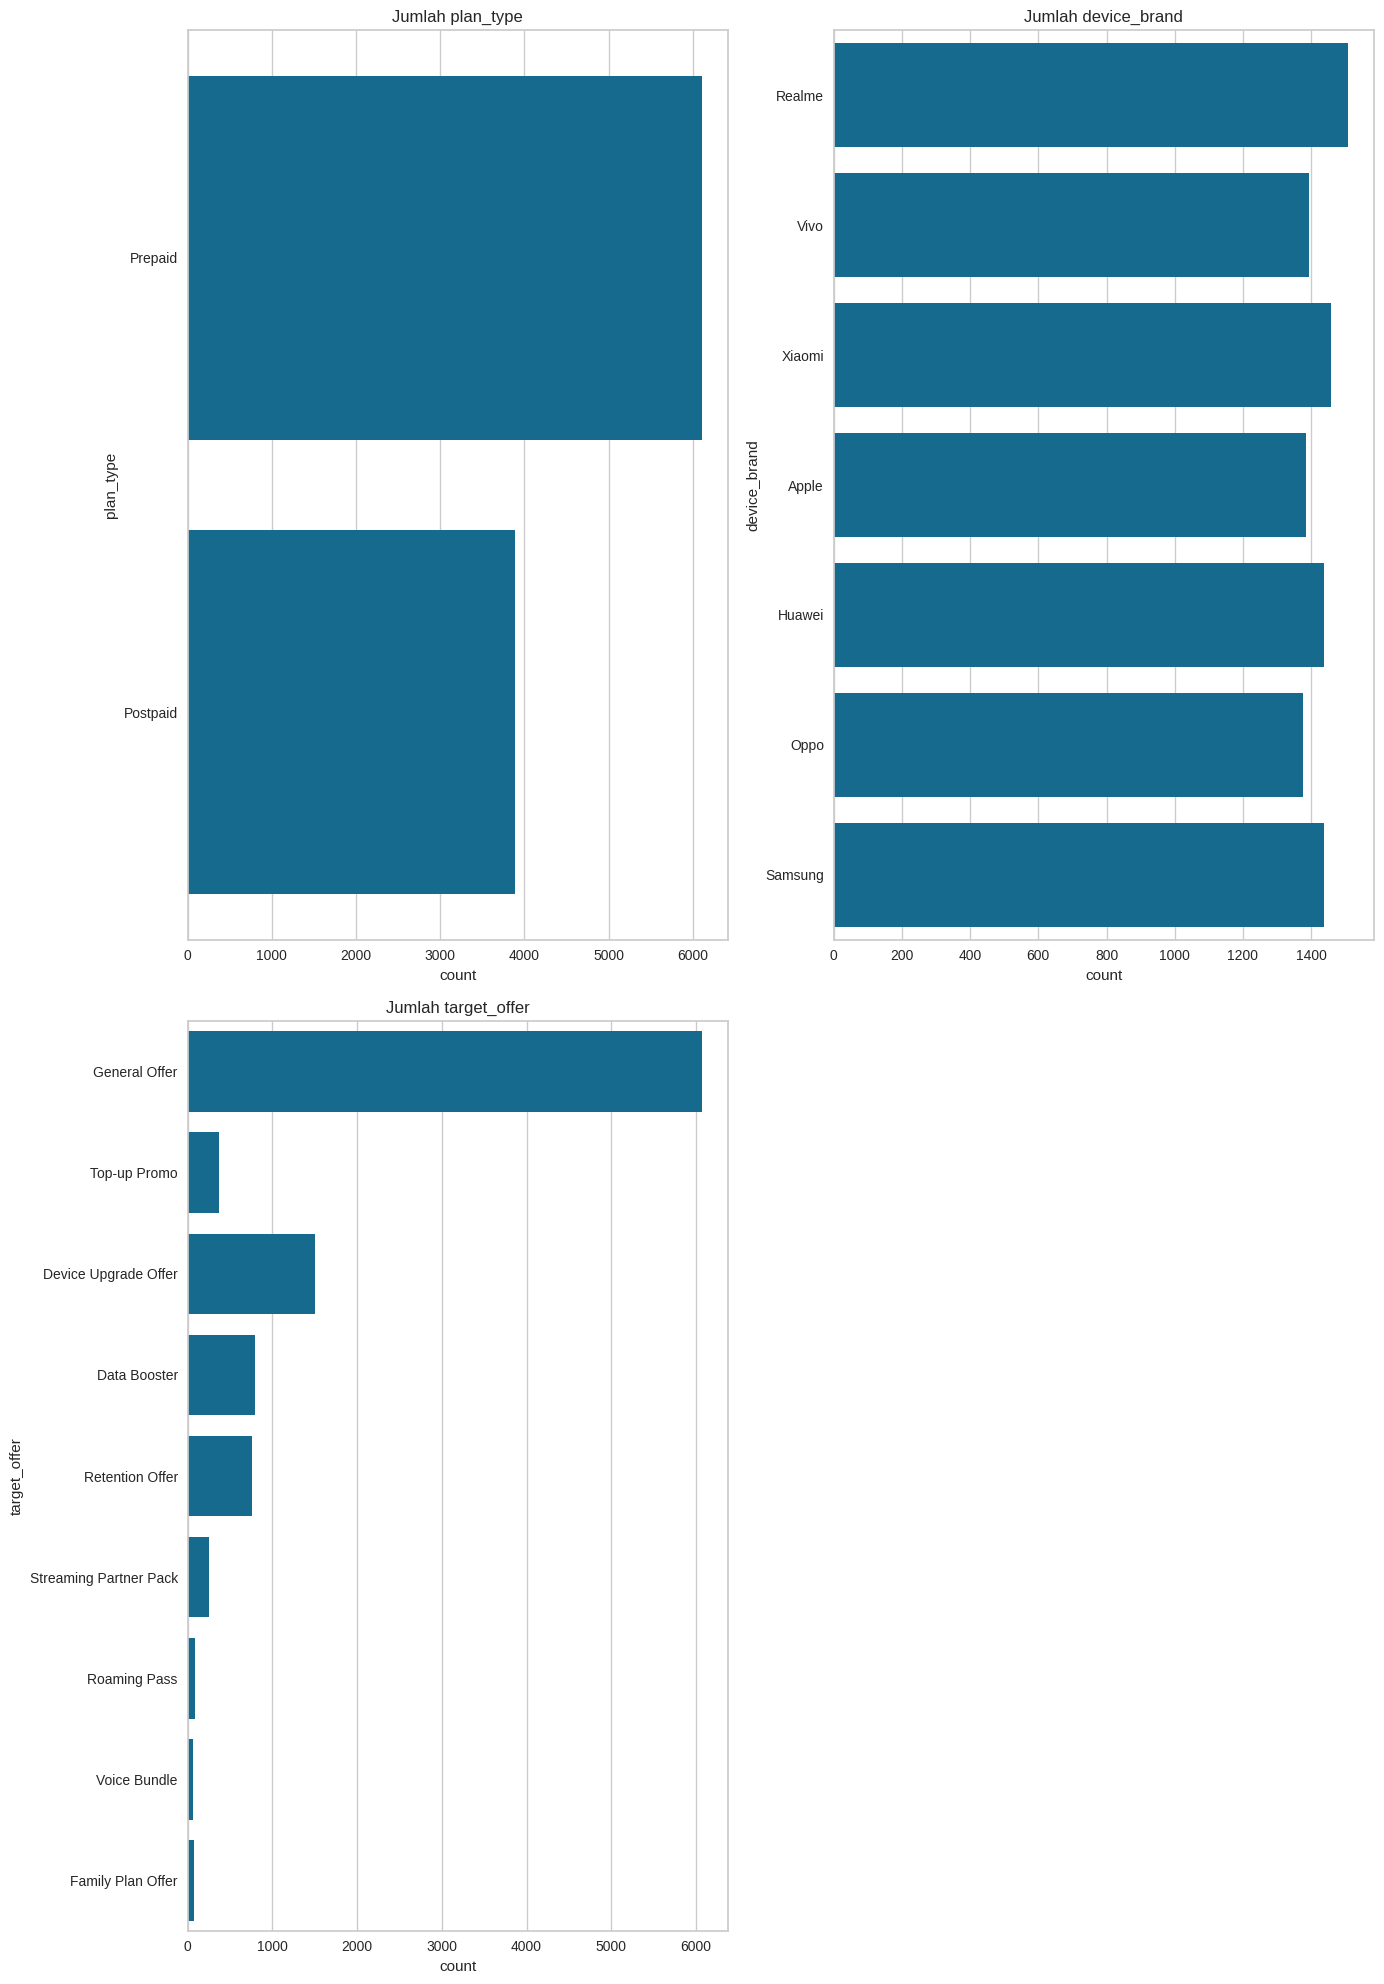

In [ ]:
# Categorical Features
categorical_features = df[['plan_type', 'device_brand', 'target_offer']]
plt.figure(figsize=(14, 20))
for i, column in enumerate(categorical_features.columns, 1):
  plt.subplot(2, 2, i)
  sns.countplot(data=df, y=column)
  plt.title(f"Jumlah {column}")

plt.tight_layout()
plt.show()

In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
customer_id,0
plan_type,0
device_brand,0
avg_data_usage_gb,0
pct_video_usage,0
avg_call_duration,0
sms_freq,0
monthly_spend,0
topup_freq,0
travel_score,0


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(0)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
scaler = MinMaxScaler()

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

df_scaled.head()

,customer_id,plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,target_offer
0,C00001,Prepaid,Realme,0.037702,0.804146,0.452407,0.333333,0.179266,0.333333,0.330081,0.0,General Offer
1,C00002,Postpaid,Vivo,0.027186,0.107686,0.496126,0.185185,0.164147,0.250000,0.131202,0.0,General Offer
2,C00003,Postpaid,Xiaomi,0.082329,0.313894,0.359159,0.333333,0.220302,0.583333,0.469350,0.0,General Offer
3,C00004,Prepaid,Apple,0.135676,0.420158,0.424184,0.148148,0.172786,0.333333,0.350927,0.0,General Offer
4,C00005,Prepaid,Huawei,0.048217,0.251638,0.536248,0.629630,0.183585,0.416667,0.569079,0.0,General Offer


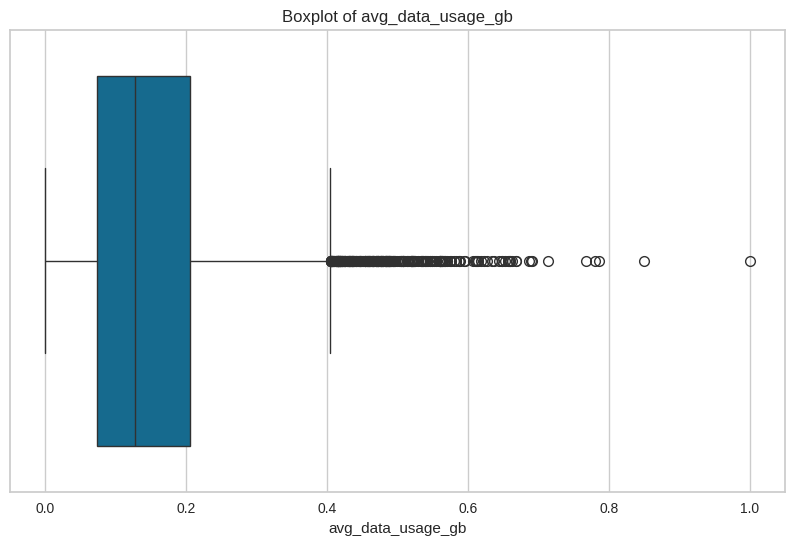

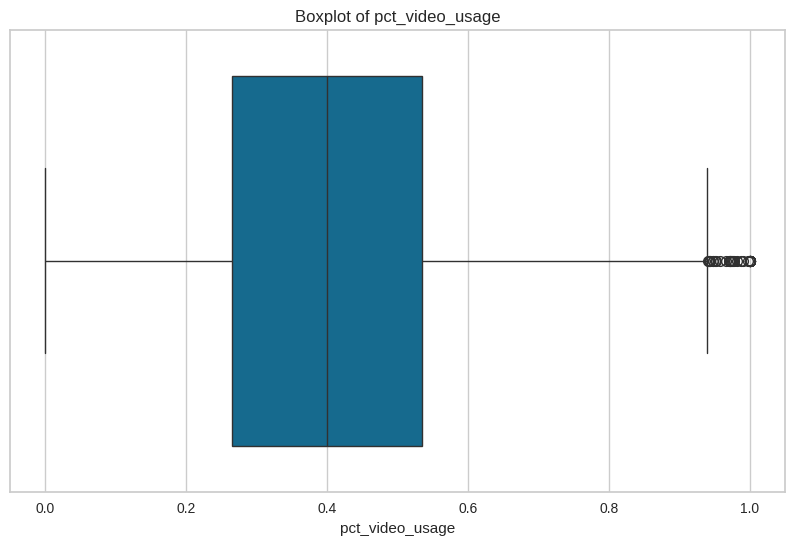

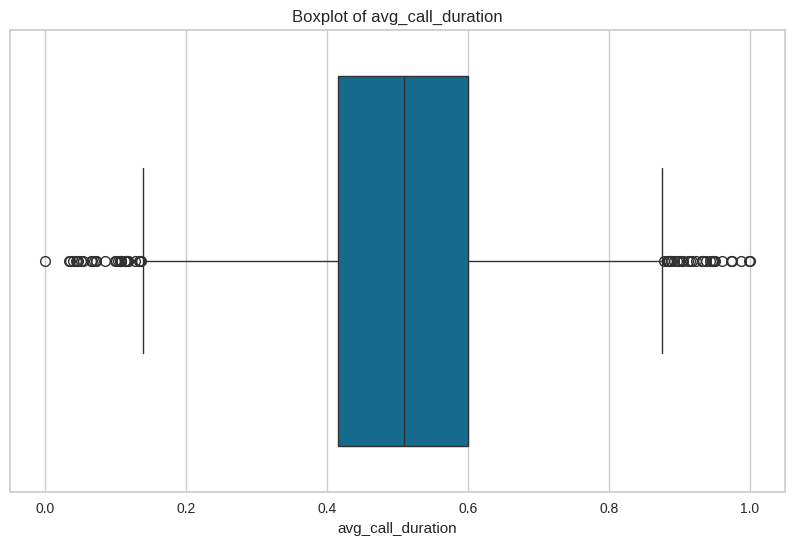

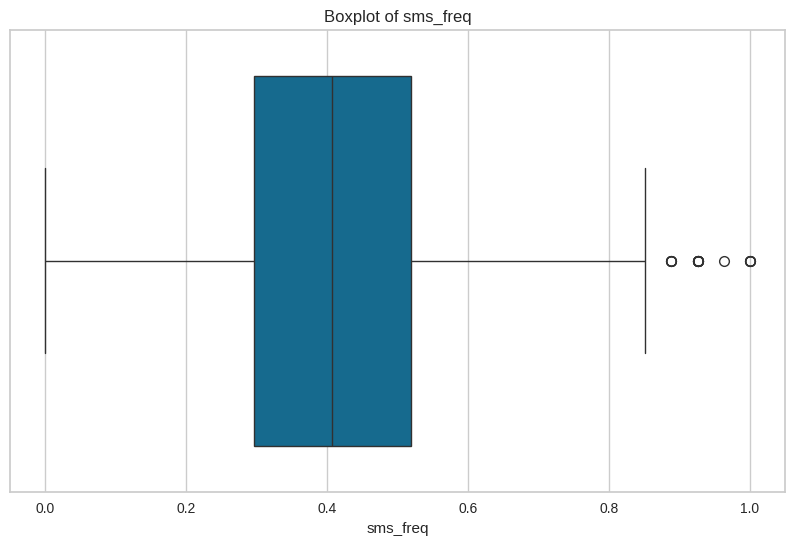

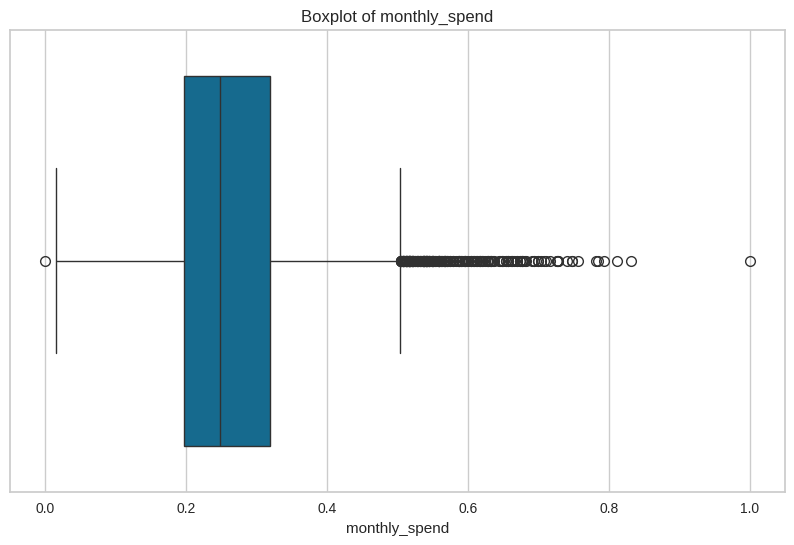

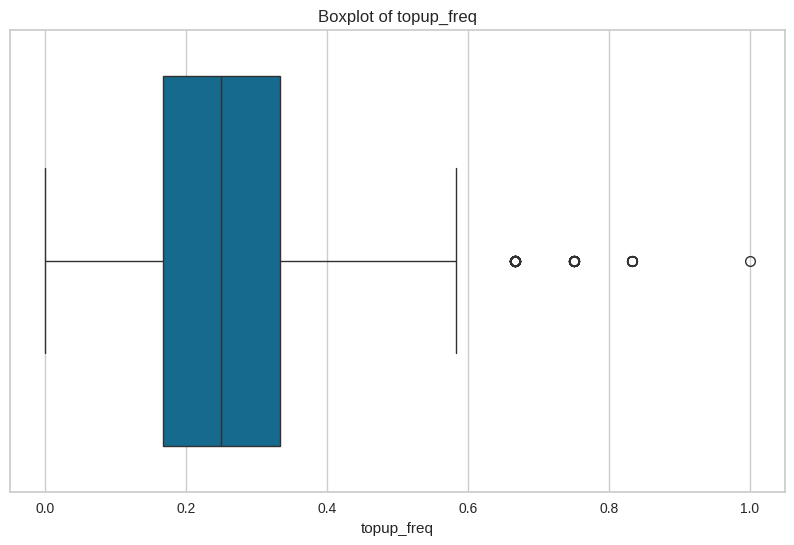

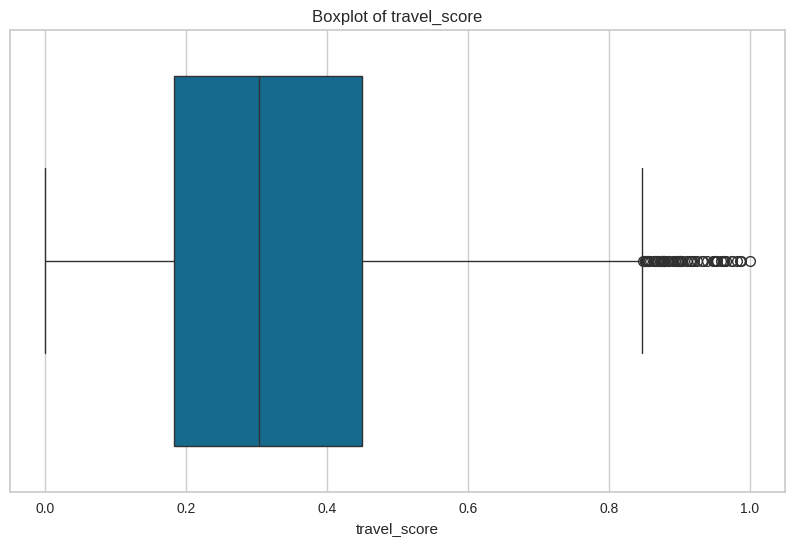

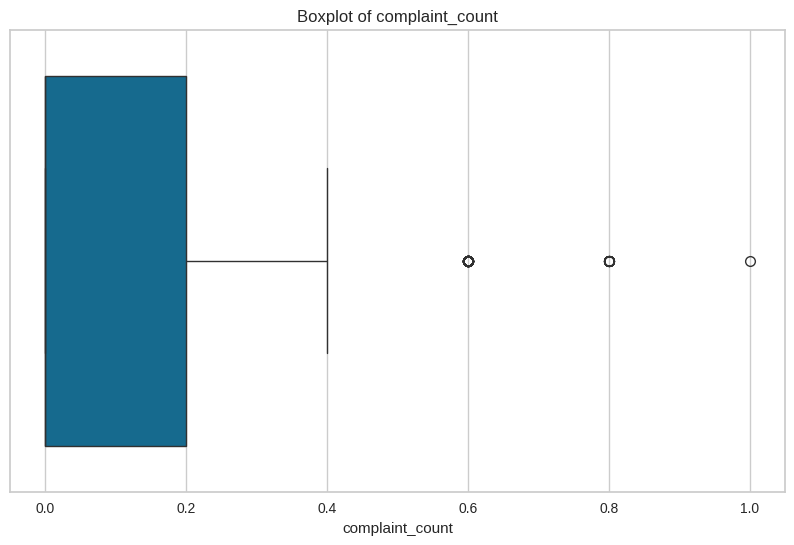

In [ ]:
# Cek outlier

numerical_features = ['avg_data_usage_gb', 'pct_video_usage', 'avg_call_duration', 'sms_freq', 'monthly_spend', 'topup_freq', 'travel_score', 'complaint_count']

for feature in numerical_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df_scaled[feature])
  plt.title(f"Boxplot of {feature}")
  plt.show()

In [ ]:
# Handling Outlier

Q1 = df_scaled[numerical_features].quantile(0.25)
Q3 = df_scaled[numerical_features].quantile(0.75)
IQR = Q3 - Q1

for column in numerical_features:
  median = df_scaled[column].median()
  df_scaled[column] = df_scaled[column].apply(lambda x: median if x < (Q1[column] - 1.5 * IQR[column]) or x > (Q3[column] + 1.5 * IQR[column]) else x)


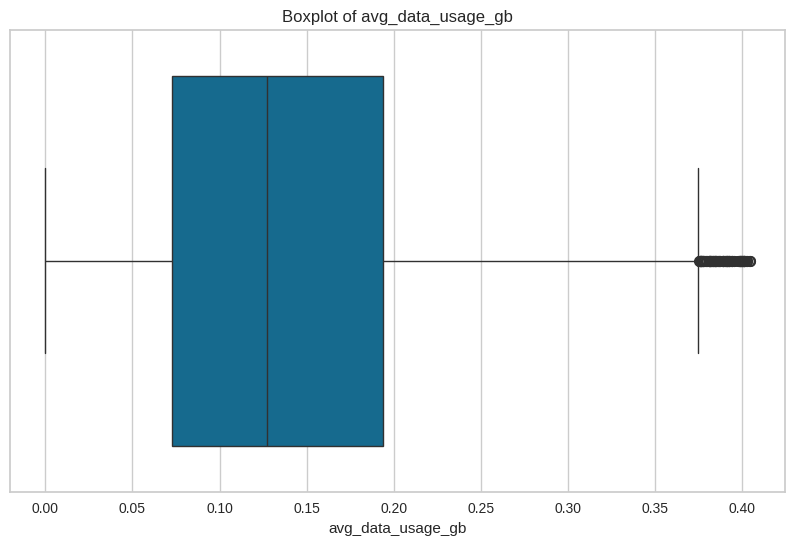

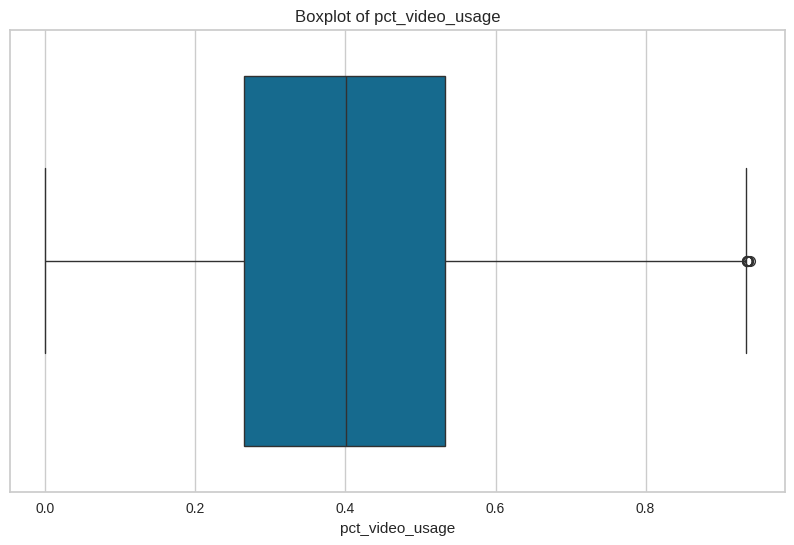

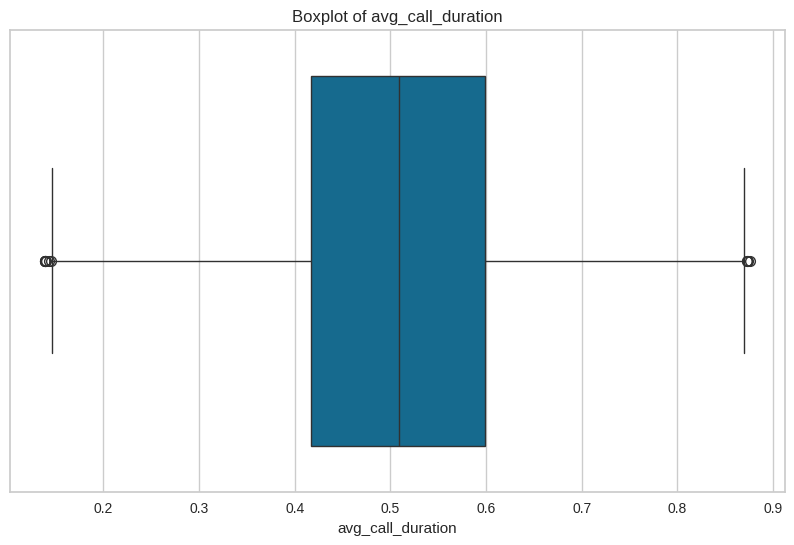

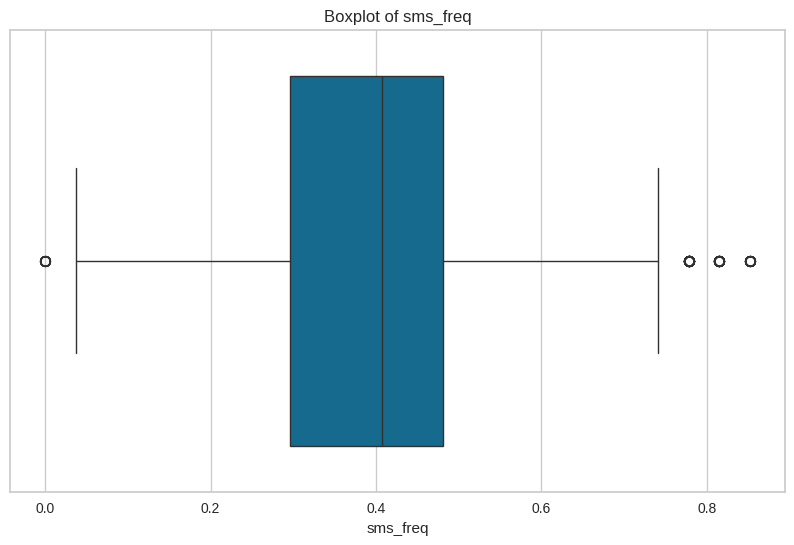

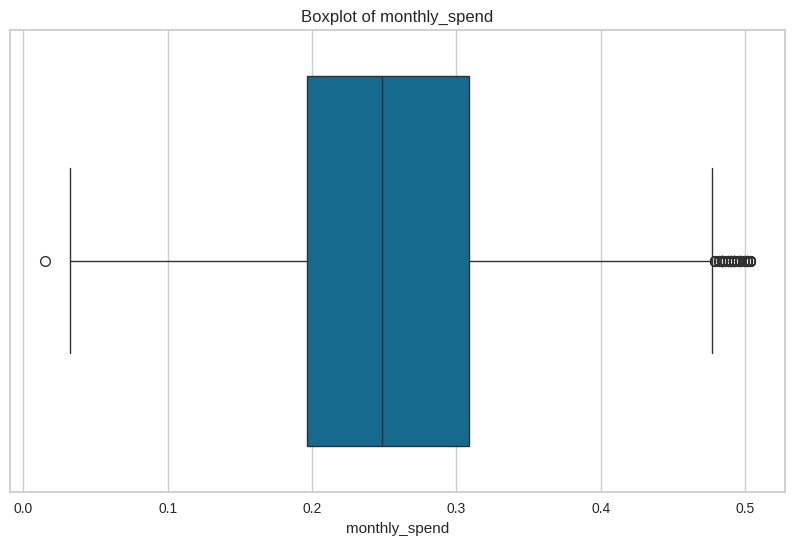

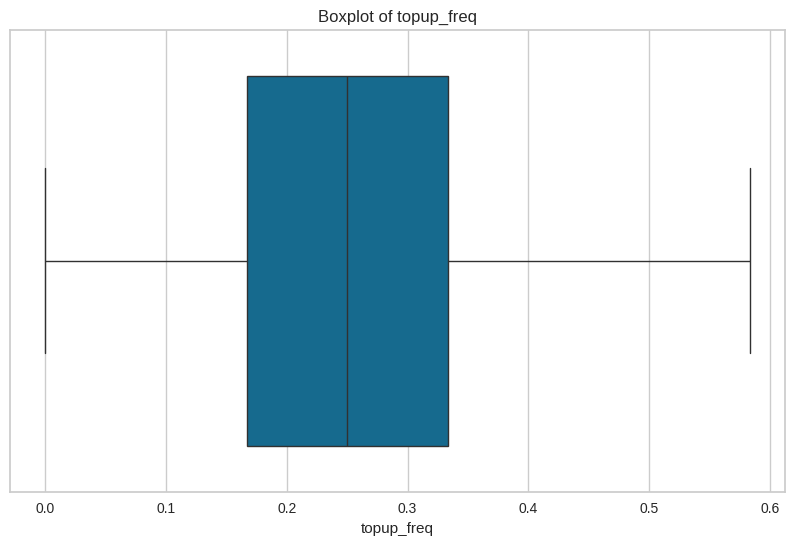

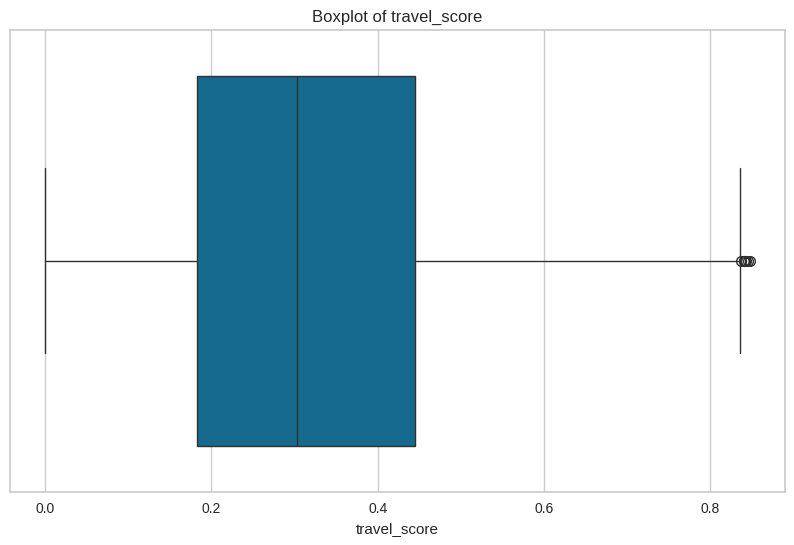

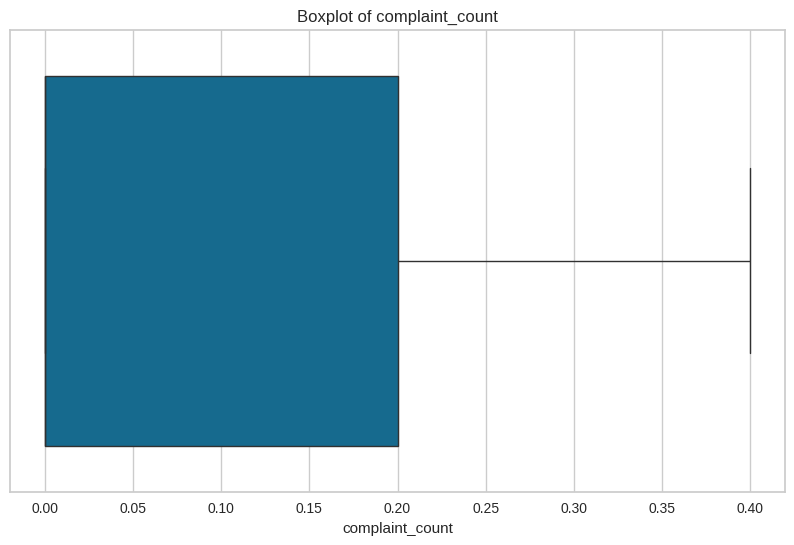

In [ ]:
# Cek grafik for outlier

for feature in numerical_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df_scaled[feature])
  plt.title(f"Boxplot of {feature}")
  plt.show()

In [ ]:
# --- 1. Pisahkan fitur & target ---
X_raw = df.drop(columns=['target_offer', 'customer_id'], errors='ignore')
y_raw = df['target_offer']

# --- 2. Split DULU (anti data leakage) ---
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)

print(f"Jumlah Data Latih: {X_train_raw.shape[0]}")
print(f"Jumlah Data Uji  : {X_test_raw.shape[0]}")

# --- 3. Tentukan kolom numerik & kategorikal ---
num_cols = X_train_raw.select_dtypes(include=['int64', 'float64']).columns
cat_cols = ['plan_type', 'device_brand']   # kolom kategorikal

# --- 4. Preprocessor (fit HANYA ke train) ---
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# --- 5. Transform ---
X_train = preprocessor.fit_transform(X_train_raw)
X_test  = preprocessor.transform(X_test_raw)

# --- 6. Encode target ---
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train_raw)
y_test  = target_encoder.transform(y_test_raw)

print("✅ Preprocessing selesai, siap training!")


Jumlah Data Latih: 8000
Jumlah Data Uji  : 2000
✅ Preprocessing selesai, siap training!


In [ ]:
print("Mulai training Gradient Boosting...")

# Model
gb_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=2,
    min_samples_leaf=20,
    random_state=42
)


# Training
gb_model.fit(X_train, y_train)
print("✅ Model selesai dilatih!")

# Prediksi
train_pred = gb_model.predict(X_train)
test_pred  = gb_model.predict(X_test)

# Evaluasi
print("Train Accuracy :", accuracy_score(y_train, train_pred))
print("Test Accuracy  :", accuracy_score(y_test, test_pred))

print("\nClassification Report:")
print(classification_report(y_test, test_pred))


Mulai training Gradient Boosting...
✅ Model selesai dilatih!
Train Accuracy : 0.9945
Test Accuracy  : 0.9935

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       146
           1       1.00      0.99      0.99       281
           2       0.60      0.27      0.38        11
           3       0.99      1.00      1.00      1286
           4       0.99      1.00      1.00       124
           5       1.00      1.00      1.00        18
           6       0.98      1.00      0.99        50
           7       1.00      1.00      1.00        73
           8       1.00      0.82      0.90        11

    accuracy                           0.99      2000
   macro avg       0.95      0.90      0.92      2000
weighted avg       0.99      0.99      0.99      2000



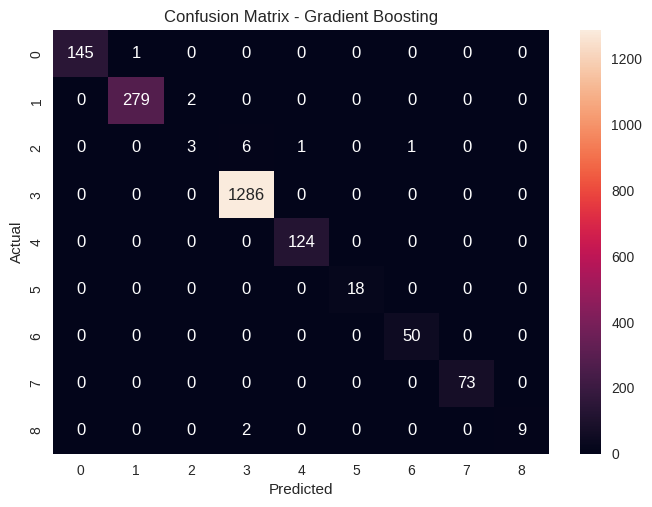

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print("Duplikat full row:", df.duplicated().sum())
print(X_raw.columns)


Duplikat full row: 0
Index(['plan_type', 'device_brand', 'avg_data_usage_gb', 'pct_video_usage',
       'avg_call_duration', 'sms_freq', 'monthly_spend', 'topup_freq',
       'travel_score', 'complaint_count'],
      dtype='object')


In [ ]:
scores = cross_val_score(gb_model, X_train, y_train, cv=5)
print(scores)
print("Mean CV:", scores.mean())


[0.99375  0.993125 0.98875  0.993125 0.990625]
Mean CV: 0.991875


In [ ]:
joblib.dump(gb_model, "model_offer.joblib")
joblib.dump(preprocessor, "preprocessor_offer.joblib")
joblib.dump(target_encoder, "encoder_offer.joblib")

print("✅ Semua file model berhasil disimpan!")


✅ Semua file model berhasil disimpan!


CODE NYA KELAR SAMPE SINI
